In [14]:
import cv2
import os
import glob
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import mahotas

In [6]:
ena_local = 'C:/temp/ena/images/train100/'
images = [os.path.split(i)[1] for i in glob.glob(ena_local + '/*.jpg', recursive=True)]

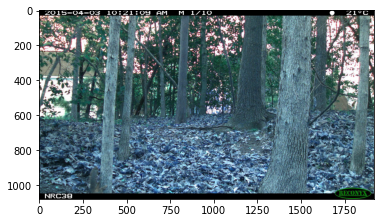

In [163]:
img = cv2.imread(ena_local + '100.jpg')
plt.imshow(img)

# Histogram / lpb stack

In [157]:
chists = np.squeeze(np.stack(tuple(cv2.calcHist(img, [i], None, [256], [0,256]) for i in (0, 1, 2))))

In [139]:
b, g, r =  (mahotas.features.lbp(img[:, :, i], 2.5, 12) for i in (0, 1, 2))
lpbrgb = np.stack((b,g,r))
chists_reshaped = np.squeeze(np.stack(tuple(cv2.calcHist(img, [i], None, [352], [0,256]) for i in (0, 1, 2))))

In [150]:
chists_reshaped.shape

(3, 352)

In [149]:
lpbrgb.shape

(3, 352)

In [154]:
s = np.vstack((lpbrgb, chists_resha ped))

In [155]:
s.shape

(6, 352)

In [156]:
np.save('c:/temp/nptest', s)

In [38]:
mahotas.features.lbp(img[:, :, 0], 1, 8)

36

# lpb 3channel

In [164]:
# https://link.springer.com/article/10.1007/s11042-020-09698-5
def lbp_l2r(img, x, y):
    ylen = img.shape[1]
    yset = set([ylen, 0])
    pc = img[x, y,1]
    res = str()
    coords = [(-1, 1), (-1, 2), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (-1, 0)]
    for coord in coords: 
        yoffset, layer = coord
        if y + yoffset in yset:
            pi = -1
        else: 
            pi = img[x, y + yoffset, layer]
        res += (str(1 * (pi >= pc)))
    return int(res, 2)

In [165]:
# try/except= 1m46
# if else: 1m44
fin = np.ndarray((img.shape[0], img.shape[1]))
for xi in range(img.shape[0]):
    for yi in range(img.shape[1]):
        fin[xi, yi] = lbp_l2r(img, xi, yi)

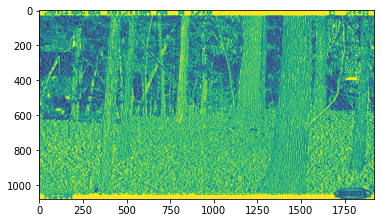

In [166]:
plt.imshow(fin)

In [167]:
cv2.imwrite('c:/temp/lbp_3channel_100.jpg', fin)

True

# Simple LBP

In [90]:
#https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [91]:
height, width, _ = img.shape

img_gray = cv2.cvtColor(img,
                        cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width),
                   np.uint8)
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

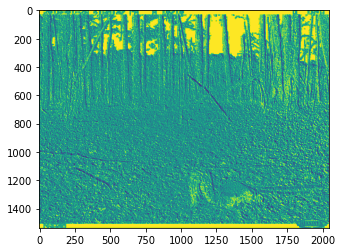

In [92]:
plt.imshow(img_lbp)

In [162]:
cv2.imwrite('c:/temp/lbp_singlechannel.jpg', img_lbp)

True

# MISC

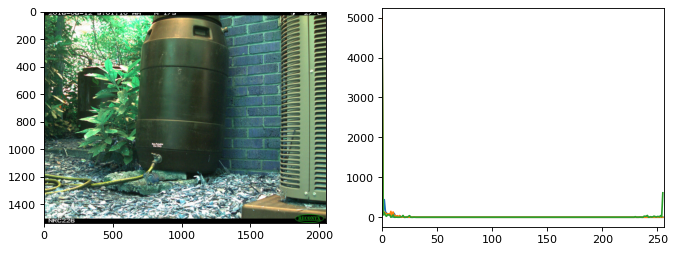

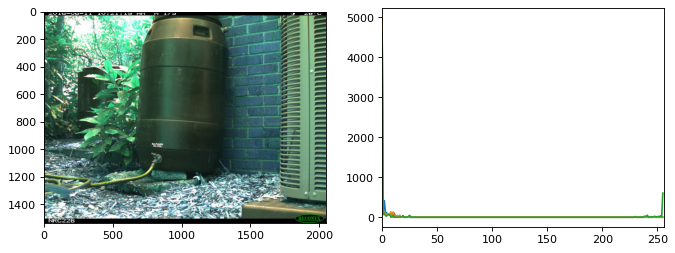

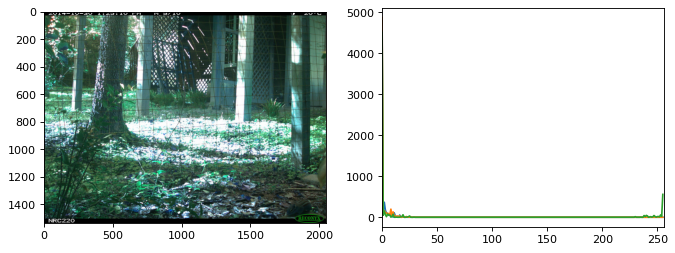

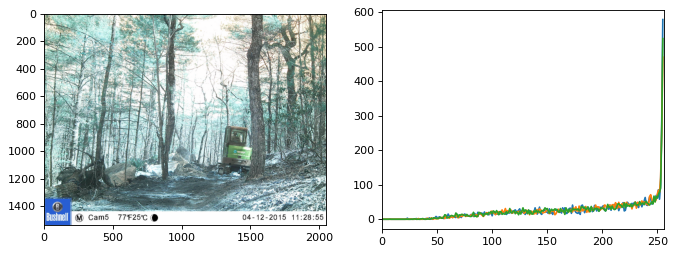

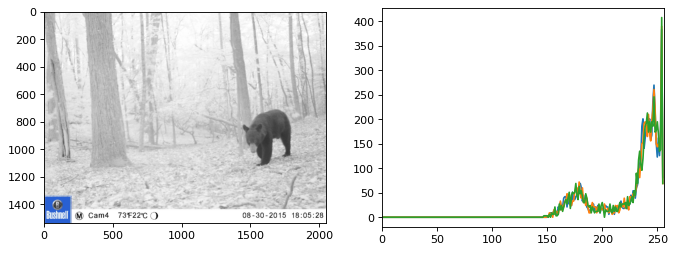

In [5]:
for i in (1,5,100,1213,5432):
    imx = images[i]
    img = cv2.imread(ena_local + imx)
    hist1 = cv2.calcHist(img, [0], None, [256], [0,256])
    hist2 = cv2.calcHist(img, [1], None, [256], [0,256])
    hist3 = cv2.calcHist(img, [2], None, [256], [0,256])
    figure(figsize=(10, 8), dpi=80)
    plt.subplot(221), plt.imshow(img)
    plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
    plt.xlim([0,256])
    plt.show()

In [6]:
hist1.shape

(256, 1)

In [170]:
import numpy as np
import torch
import torch.nn as nn

In [249]:
class ConvNet1D(nn.Module):
    def __init__(self):
        super().__init__()  
        self.layer1 = nn.Sequential(
            nn.Conv1d(6, 1, 3),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(5))
        self.layer3 = nn.Sequential(
            nn.Linear(70,50),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(50,22),
            nn.Softmax())

    def forward(self, x):
        out = self.layer1(x)
        print(out.shape)
        out = self.layer3(out)
        print(out.shape)
        out = self.layer4(out)
        print(out.shape)
        return out

model = ConvNet1D()

In [250]:
st = torch.Tensor(s)
st = st[None, :]
model.forward(st)

torch.Size([1, 1, 70])
torch.Size([1, 1, 50])
torch.Size([1, 1, 22])


c:\Projects\pyvenvs\wildsenv\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1.]]], grad_fn=<SoftmaxBackward0>)

In [209]:
model.forward(hist4)

NameError: name 'hist4' is not defined

In [ ]:


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
total_step = len(trainX)

# transformation of data into torch tensors
trainXT = torch.from_numpy(trainX)
trainXT = trainXT.transpose(1,2).float() #input is (N, Cin, Lin) = Ntimesteps, Nfeatures, 128
trainyT = torch.from_numpy(trainy).float()
testXT = torch.from_numpy(testX)
testXT = testXT.transpose(1,2).float()
testyT = torch.from_numpy(testy).float()
num_epochs = 50
batch_size = 32

loss_list = []
acc_list = []
acc_list_epoch = []
for epoch in range(num_epochs):
    correct_sum = 0
    for i in range(int(np.floor(total_step/batch_size))): # split data into batches
        trainXT_seg = trainXT[i*batch_size:(i+1)*batch_size]
        trainyT_seg = trainyT[i*batch_size:(i+1)*batch_size]
        # Run the forward pass
        outputs = model(trainXT_seg)
        loss = criterion(outputs, torch.max(trainyT_seg, 1)[1])
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = trainyT_seg.size(0)
        _, predicted = torch.max(outputs, 1)
        _, actual = torch.max(trainyT_seg, 1)
        correct = (predicted == actual).sum().item()
        correct_sum = correct_sum + (correct/total)
        acc_list.append(correct / total)
    print("Epoch")
    print(epoch)
    print("accuracy")
    print(correct_sum/int(np.floor(total_step/batch_size)))
    acc_list_epoch.append(correct_sum/int(np.floor(total_step/batch_size)))